In [69]:
%matplotlib inline
import diogenes
import numpy as np

Get data from wine quality data set

In [70]:
data = diogenes.read.open_csv_url(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
    delimiter=';')

Note that data is a [Numpy structured array](http://docs.scipy.org/doc/numpy/user/basics.rec.html) We can use it like this:

In [71]:
data.dtype.names

('fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality')

In [72]:
print data.shape

(4898,)


In [73]:
print data['fixed acidity']

[ 7.   6.3  8.1 ...,  6.5  5.5  6. ]


We separate our labels from the rest of the data and turn our labels into binary classes.

In [74]:
labels = data['quality']
labels = labels < np.average(labels)
print labels

[False False False ..., False False False]


Remove the labels from the rest of our data

In [75]:
M = diogenes.modify.remove_cols(data, 'quality')
print M.dtype.names

('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')


Print summary statistics for our features

In [76]:
diogenes.display.pprint_sa(diogenes.display.describe_cols(M))

            Column Name Count            Mean     Standard Dev Minimum Maximum
 0        fixed acidity  4898   6.85478766844   0.843782079126     3.8    14.2
 1     volatile acidity  4898  0.278241118824   0.100784258542    0.08     1.1
 2          citric acid  4898  0.334191506737    0.12100744957     0.0    1.66
 3       residual sugar  4898   6.39141486321    5.07153998933     0.6    65.8
 4            chlorides  4898 0.0457723560637  0.0218457376851   0.009   0.346
 5  free sulfur dioxide  4898   35.3080849326    17.0054011058     2.0   289.0
 6 total sulfur dioxide  4898   138.360657411    42.4937260248     9.0   440.0
 7              density  4898   0.99402737648 0.00299060158215 0.98711 1.03898
 8                   pH  4898   3.18826663944   0.150985184312    2.72    3.82
 9            sulphates  4898  0.489846876276   0.114114183106    0.22    1.08
10              alcohol  4898   10.5142670478    1.23049493654     8.0    14.2


Plot correlation between features

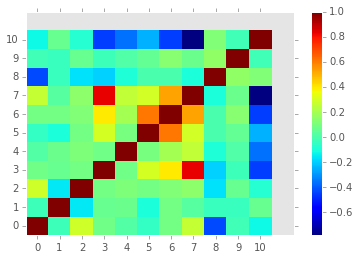

In [77]:
fig = diogenes.display.plot_correlation_matrix(M)

Arrange an experiment trying different classifiers

In [96]:
exp = diogenes.grid_search.experiment.Experiment(
    M,
    labels,
    clfs=diogenes.grid_search.standard_clfs.std_clfs)
trials = exp.run()

/Users/zar1/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:209: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/zar1/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:209: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Make a pdf report

In [97]:
exp.make_report(verbose=False)

'/Users/zar1/dssg/diogenes/doc/notebooks/report.pdf'

Find the trial with the best score and make an ROC curve

In [98]:
trials_with_score = exp.average_score()
best_trial, best_score = max(trials_with_score.iteritems(), key=lambda trial_and_score: trial_and_score[1])
print best_trial
print best_score

Trial(clf=<class 'sklearn.ensemble.forest.RandomForestClassifier'>, clf_params={'n_estimators': 10, 'max_features': 'log2', 'n_jobs': 1, 'max_depth': 7}, subset=<class 'diogenes.grid_search.subset.SubsetNoSubset'>, subset_params={}, cv=<class 'sklearn.cross_validation.KFold'>, cv_params={})
0.757462757506


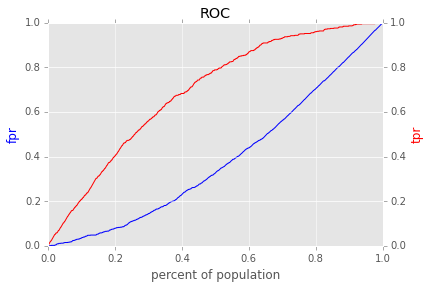

In [99]:
fig = best_trial.roc_curve()